In [2]:
!pip install umap-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [8]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.datasets import load_digits

In [6]:
plt.style.use('ggplot')
data = pd.read_excel('data.xlsx', sheet_name='Part4')
print(f"Data shape: {data.shape}")
print(f"Columns: {list(data.columns)}")
print(f"\nFirst few rows:\n{data.head()}")

Data shape: (1000, 26)
Columns: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

First few rows:
          A          B         C          D         E         F          G  \
0  7.190513   9.393277 -3.585426  -9.054379 -4.980899 -3.154864   6.024110   
1  2.131579  -6.487887 -7.531750  10.566158  8.627653  6.969129  -3.142322   
2 -3.749896  -4.392698  7.243313  -4.313058 -4.585193  1.569839 -10.115286   
3 -6.221334   3.582153  5.512285   1.652112  6.114611  1.003193  -0.262607   
4  7.541668  10.395585 -4.902781  -7.651656 -5.295771 -1.472042   5.275471   

          H          I          J  ...         Q         R         S  \
0  7.405692  -7.483733   0.533495  ... -0.810933  3.578808 -2.662475   
1 -6.973145   4.183350  -3.139448  ... -3.424025 -0.896966 -1.586641   
2  7.379393  -8.155308  10.454466  ...  6.187471 -6.597870 -2.676831   
3 -1.563350 -10.101767  -7.894783  ... -1.464332  5.450553 -6.6

In [10]:
digits = load_digits()
X = digits.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Reference: UMAP documentation https://umap-learn.readthedocs.io/en/latest/
reducer = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42,
    verbose=True
)

X_umap = reducer.fit_transform(X_scaled)
plt.figure(figsize=(10, 8))

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(n_jobs=1, random_state=42, verbose=True)
Sat Oct 18 01:58:06 2025 Construct fuzzy simplicial set
Sat Oct 18 01:58:09 2025 Finding Nearest Neighbors
Sat Oct 18 01:58:14 2025 Finished Nearest Neighbor Search
Sat Oct 18 01:58:17 2025 Construct embedding


Epochs completed:   5%| ▍          23/500 [00:00]

	completed  0  /  500 epochs


Epochs completed:  17%| █▋         84/500 [00:01]

	completed  50  /  500 epochs


Epochs completed:  25%| ██▌        125/500 [00:01]

	completed  100  /  500 epochs


Epochs completed:  37%| ███▋       185/500 [00:01]

	completed  150  /  500 epochs


Epochs completed:  45%| ████▌      225/500 [00:01]

	completed  200  /  500 epochs


Epochs completed:  57%| █████▋     283/500 [00:02]

	completed  250  /  500 epochs


Epochs completed:  64%| ██████▍    321/500 [00:02]

	completed  300  /  500 epochs


Epochs completed:  76%| ███████▌   380/500 [00:02]

	completed  350  /  500 epochs


Epochs completed:  88%| ████████▊  440/500 [00:03]

	completed  400  /  500 epochs


Epochs completed:  96%| █████████▌ 480/500 [00:03]

	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:03]


Sat Oct 18 01:58:20 2025 Finished embedding


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

/tmp/ipykernel_31609/3269358455.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], s=15, cmap='viridis')


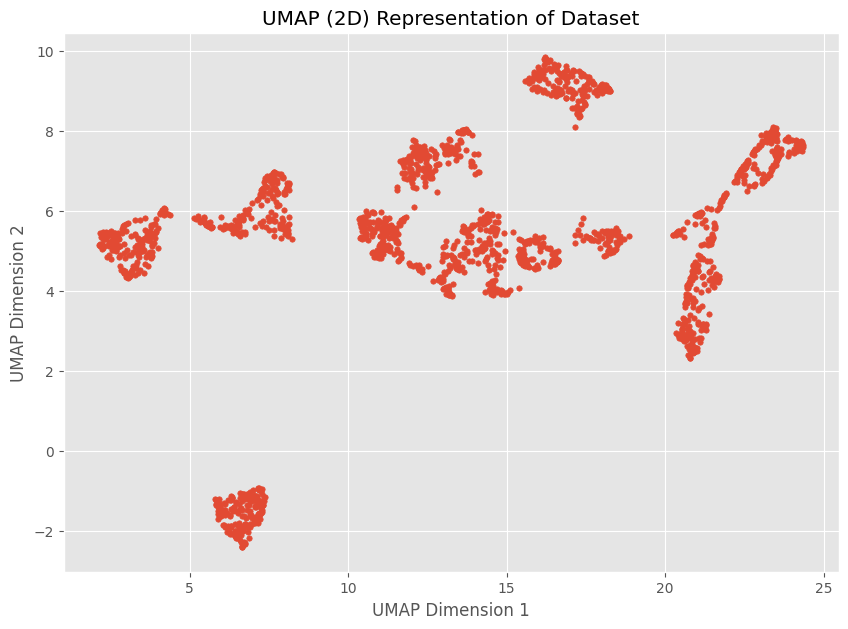

In [12]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], s=15, cmap='viridis') 
plt.title("UMAP (2D) Representation of Dataset")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

In [13]:
k_range = range(2, 11)
ch_scores = []

for k in k_range:
    print(f"\n  Testing k={k}...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_umap)
    score = calinski_harabasz_score(X_umap, labels)
    ch_scores.append(score)
    print(f"    Calinski-Harabasz Score: {score:.2f}")
    print(f"    Inertia: {kmeans.inertia_:.2f}")


  Testing k=2...
    Calinski-Harabasz Score: 2941.82
    Inertia: 31569.04

  Testing k=3...
    Calinski-Harabasz Score: 3414.38
    Inertia: 17332.49

  Testing k=4...
    Calinski-Harabasz Score: 3981.11
    Inertia: 10874.16

  Testing k=5...
    Calinski-Harabasz Score: 4792.14
    Inertia: 7122.41

  Testing k=6...
    Calinski-Harabasz Score: 5180.89
    Inertia: 5387.30

  Testing k=7...
    Calinski-Harabasz Score: 6040.68
    Inertia: 3920.70

  Testing k=8...
    Calinski-Harabasz Score: 8395.60
    Inertia: 2461.05

  Testing k=9...
    Calinski-Harabasz Score: 9534.46
    Inertia: 1908.11

  Testing k=10...
    Calinski-Harabasz Score: 11668.26
    Inertia: 1393.90


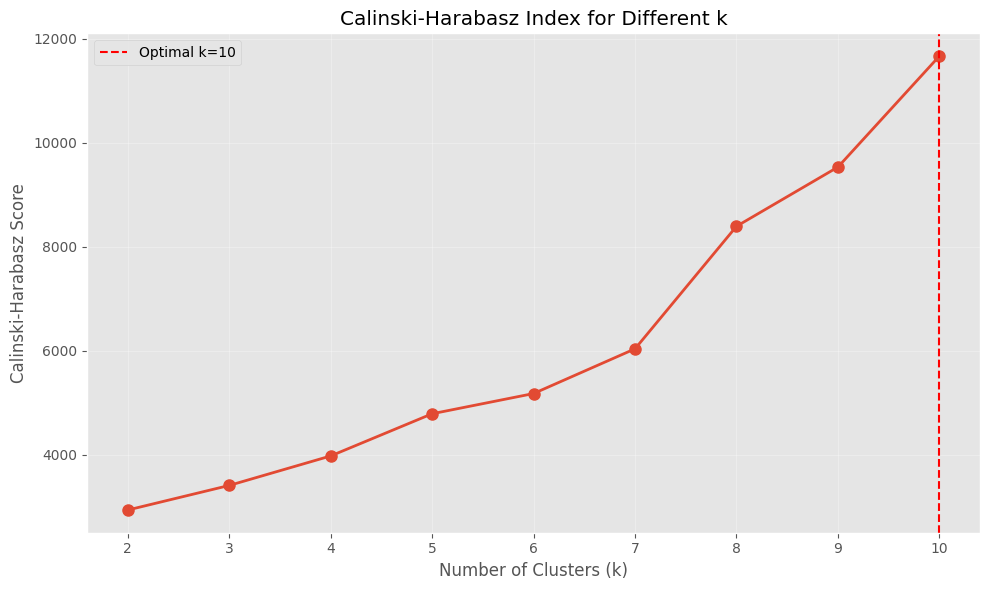

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, ch_scores, 'o-', linewidth=2, markersize=8)
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k={optimal_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Index for Different k')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Q3_optimal_k.png', dpi=300)
plt.show()

In [24]:
optimal_k = k_range[np.argmax(ch_scores)]
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_umap)

In [25]:
for i in range(optimal_k):
    count = np.sum(cluster_labels == i)
    pct = 100 * count / len(cluster_labels)
    print(f"Cluster {i}: {count} samples ({pct:.1f}%)")

Cluster 0: 158 samples (8.8%)
Cluster 1: 214 samples (11.9%)
Cluster 2: 182 samples (10.1%)
Cluster 3: 178 samples (9.9%)
Cluster 4: 183 samples (10.2%)
Cluster 5: 119 samples (6.6%)
Cluster 6: 192 samples (10.7%)
Cluster 7: 173 samples (9.6%)
Cluster 8: 232 samples (12.9%)
Cluster 9: 166 samples (9.2%)


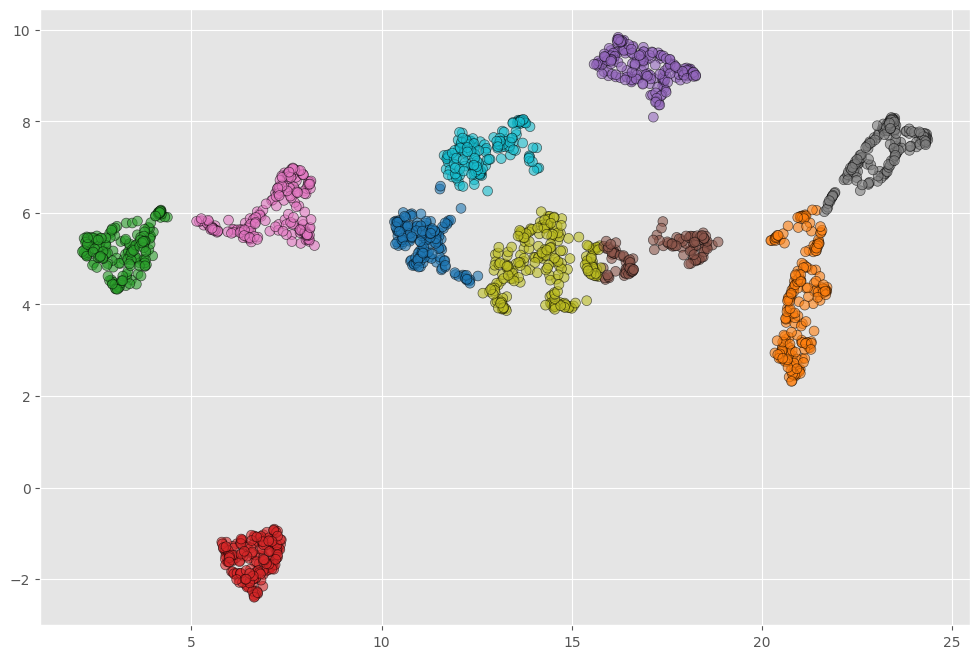

In [26]:
plt.figure(figsize=(12, 8))

# Create scatter plot with cluster colors
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1],
                     c=cluster_labels, cmap='tab10',
                     s=50, alpha=0.6, edgecolors='black', linewidth=0.5)

/tmp/ipykernel_31609/1845121606.py:11: UserWarning: Adding colorbar to a different Figure <Figure size 1200x800 with 2 Axes> than <Figure size 640x480 with 1 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter, label='Cluster', ticks=range(optimal_k))


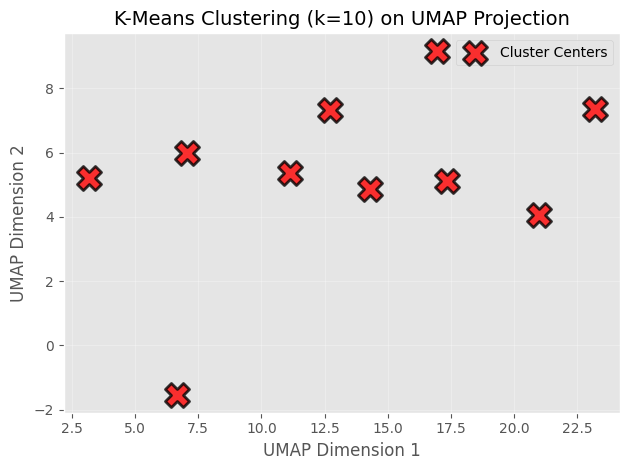

In [27]:
centers = kmeans_final.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
           c='red', s=300, alpha=0.8,
           marker='X', edgecolors='black', linewidth=2,
           label='Cluster Centers')

plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.title(f'K-Means Clustering (k={optimal_k}) on UMAP Projection', 
          fontsize=14)
plt.colorbar(scatter, label='Cluster', ticks=range(optimal_k))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Q4_clusters_on_umap.png', dpi=300, bbox_inches='tight')
plt.show()
